In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, estimate_bandwidth, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузка данных
data = pd.read_csv('s1.txt', delim_whitespace=True, header=None, names=['x', 'y'])
X = data.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[0.61045883 0.23847578]
 [0.61735618 0.26824035]
 [0.33642184 0.34275992]
 ...
 [0.55523906 1.55441419]
 [0.34654287 1.54353712]
 [0.69199982 1.47511126]]


C:\Users\artem\AppData\Local\Temp\ipykernel_5432\3583174067.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('s1.txt', delim_whitespace=True, header=None, names=['x', 'y'])


In [3]:
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(12, 8))
    unique_labels = np.unique(labels)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 
              'gold', 'slategray', 'lime', 'hotpink', 'coral', 'aquamarine', 'indigo', 'yellowgreen']
    for i, label in enumerate(unique_labels):
        color = colors[i]
        if label == -1:
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label='Noisy', color=color)
        else:
            plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}', color=color)

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='X', label='Centers')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='lower right', bbox_to_anchor=(0.5, 0.1, 0.65, 0.5))
    plt.grid()
    plt.show()

C:\Users\artem\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\artem\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


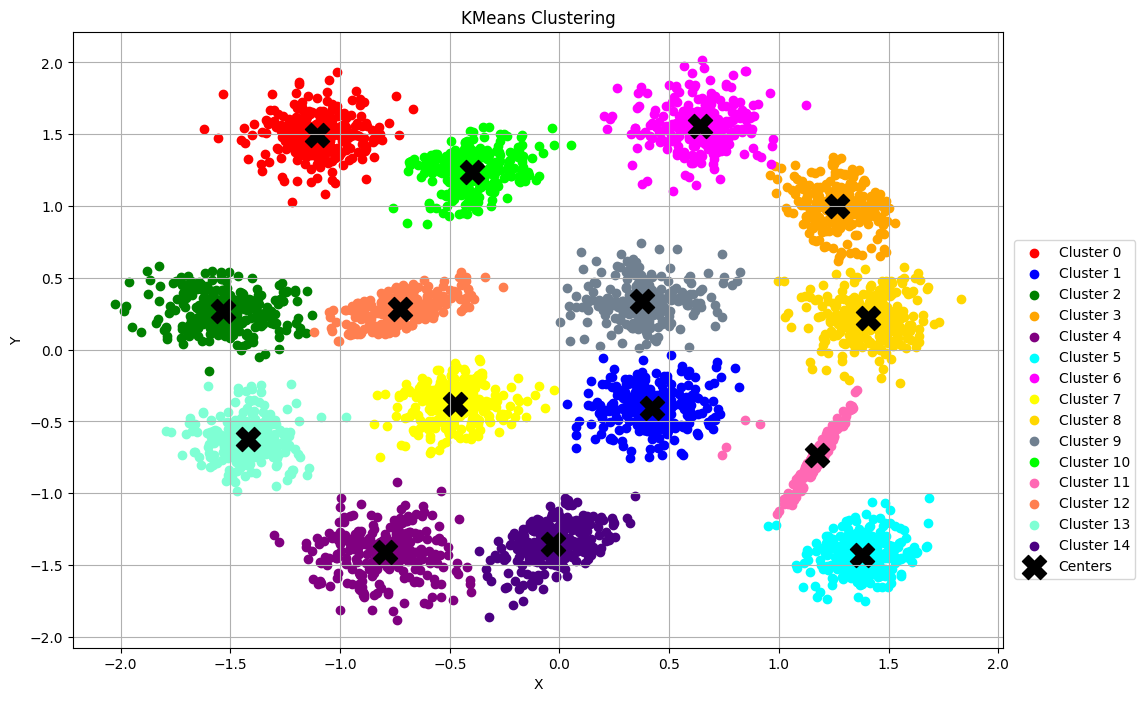

In [4]:
# KMeans
kmeans = KMeans(n_clusters=15)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, kmeans.cluster_centers_, 'KMeans Clustering')

Простой и быстрый метод. Он заключается в выборе случайного N-количества центров кластеров,
все точки поближе к центру зачисляются в один кластер, после происходит пересчет всех точек кластера и определение нового центра

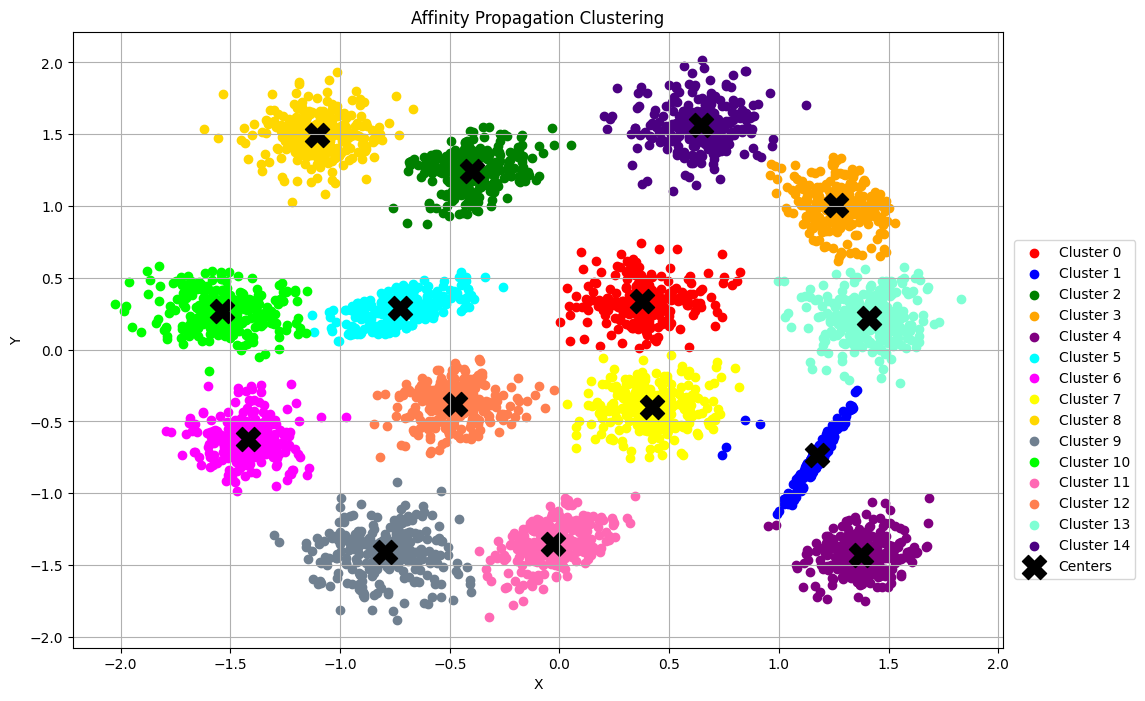

In [5]:
# Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.8, preference=-10, random_state=42)
affinity_labels = affinity_propagation.fit_predict(X_scaled)
plot_clusters(X_scaled, affinity_labels, affinity_propagation.cluster_centers_, 'Affinity Propagation Clustering')

Смерть.........

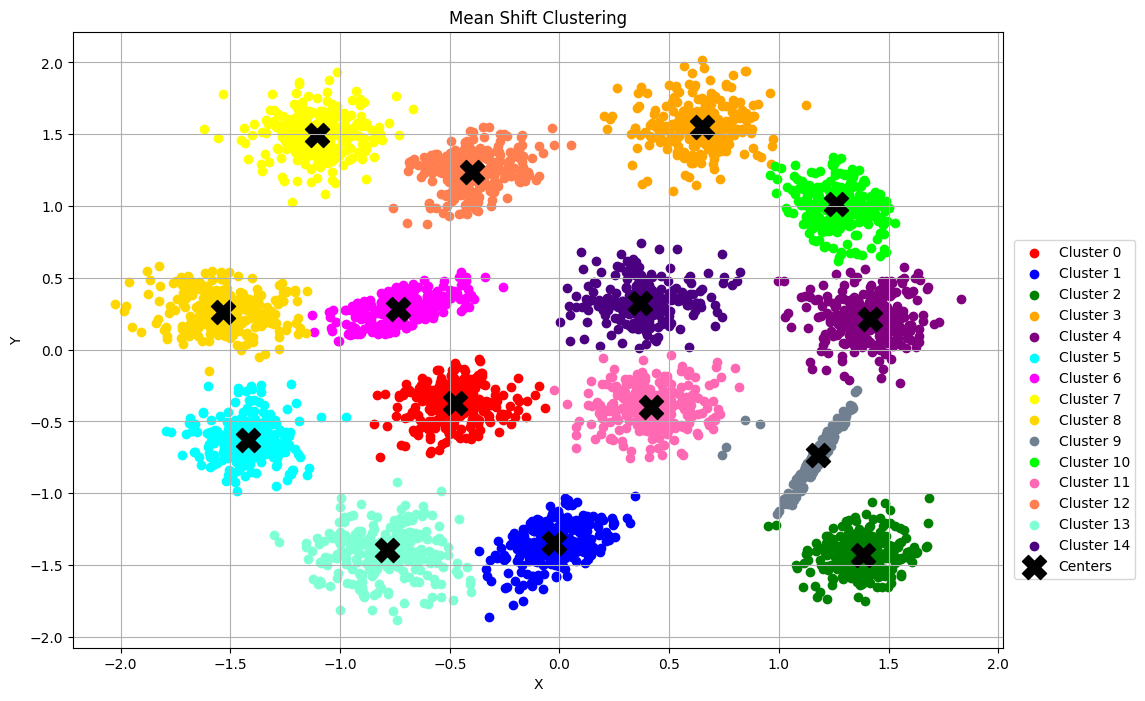

In [6]:
bandwidth = estimate_bandwidth(X_scaled, quantile=0.05)
# Mean Shift
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(X_scaled)
plot_clusters(X_scaled, mean_shift_labels, mean_shift.cluster_centers_, 'Mean Shift Clustering')

Определяет точки плотности и 'сдвигает' другие точки к этим центрам
Очень хорошо подходит для кластреров непонятной формы

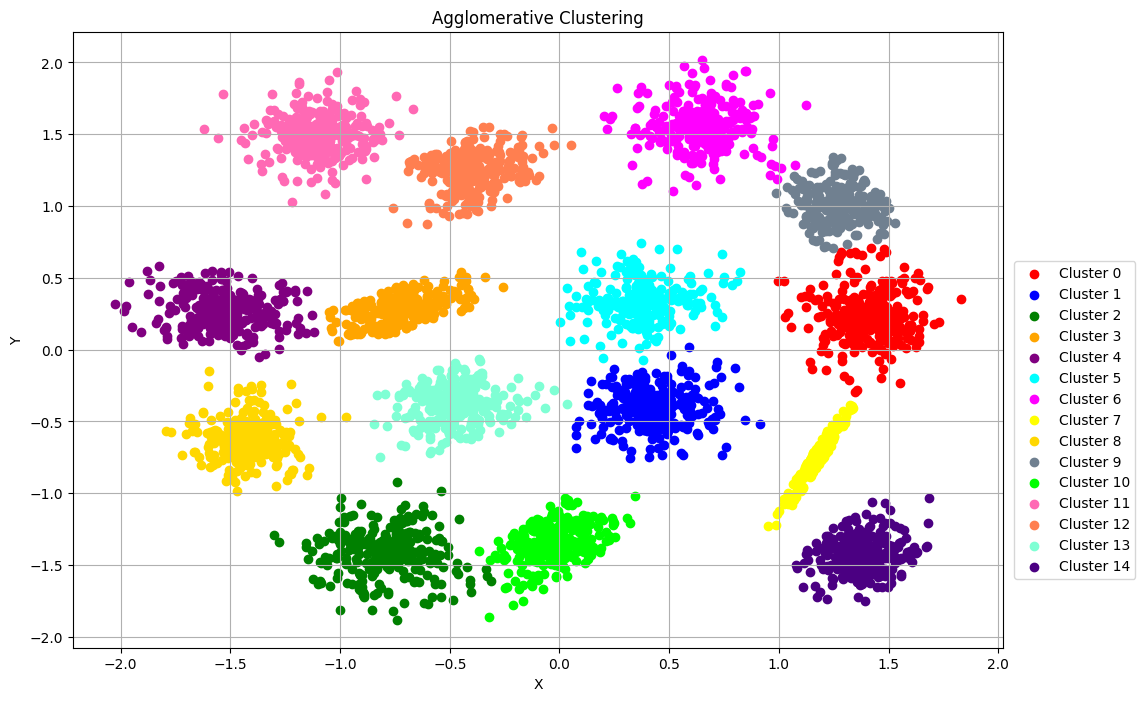

In [7]:
# Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=15)
agglo_labels = agglo_clustering.fit_predict(X_scaled)
plot_clusters(X_scaled, agglo_labels, None, 'Agglomerative Clustering')



Строит дендограмму, соединяет на основе расстрояния две точки, потом содиняет пары и т.д.

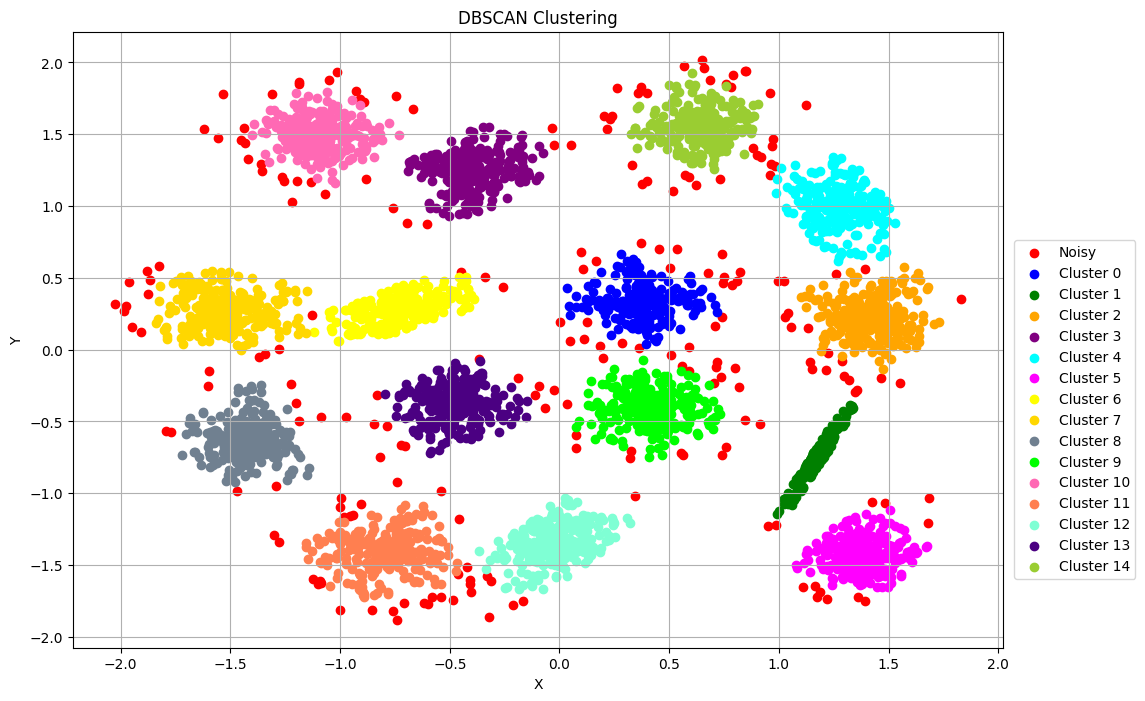

In [15]:
# DBSCAN
dbscan = DBSCAN(eps=0.085, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_scaled)
plot_clusters(X_scaled, dbscan_labels, None, 'DBSCAN Clustering')


Метод кластеризации, основанный на плотности, он группирует близкие друг к другу точки, которые находятся в плотных областях и определяет их шум 